<a href="https://colab.research.google.com/github/lutfilaili/genAI_Finance-GPT/blob/main/The_Impact_of_Starlink's_Arrival_in_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT REQUIRED LIBRARY

In [ ]:
import pandas as pd
import datetime
from datetime import timedelta
import requests
import matplotlib.pyplot as plt


In [ ]:
df_daily_hist = pd.DataFrame()

api_key = "api_key" #place API key here

def get_date_list(start_date):
    start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')

    end_date = datetime.datetime.today()

    date_list = []

    while start_date < end_date:
        date_list.append(start_date)
        start_date += timedelta(days=90)

    date_list.append(end_date)

    return date_list

date = get_date_list("2024-04-01")

for i in ["TLKM.JK","ISAT.JK","EXCL.JK","KBLV.JK"]:
    for j in range (0,len(date)-1):
        if j==0:
            start_date = date[j]
            start_date = start_date.strftime('%Y-%m-%d')

            end_date = date[j+1]
            end_date = end_date.strftime('%Y-%m-%d')
        else:
            start_date = date[j]+ timedelta(days=1)
            start_date = start_date.strftime('%Y-%m-%d')

            end_date = date[j+1]
            end_date = end_date.strftime('%Y-%m-%d')

        url = f"https://api.sectors.app/v1/daily/{i}/?start={start_date}&end={end_date}"


        headers = {
            "Authorization": api_key
        }

        response = requests.get(url, headers = headers)

        if response.status_code == 200:
            data = response.json()
        else:
            # Handle error
            print(response.status_code)

        df_daily_hist = pd.concat([df_daily_hist,pd.DataFrame(data)])

        print(f"Finish collect data for stock {i} from {start_date} to {end_date}")


Finish collect data for stock TLKM.JK from 2024-04-01 to 2024-06-30
Finish collect data for stock TLKM.JK from 2024-07-01 to 2024-07-17
Finish collect data for stock ISAT.JK from 2024-04-01 to 2024-06-30
Finish collect data for stock ISAT.JK from 2024-07-01 to 2024-07-17
Finish collect data for stock EXCL.JK from 2024-04-01 to 2024-06-30
Finish collect data for stock EXCL.JK from 2024-07-01 to 2024-07-17
Finish collect data for stock KBLV.JK from 2024-04-01 to 2024-06-30
Finish collect data for stock KBLV.JK from 2024-07-01 to 2024-07-17


In [ ]:
# check tabular data
df_daily_hist

,symbol,date,close,volume,market_cap
0,TLKM.JK,2024-04-01,3510,248116300,347708338470912
1,TLKM.JK,2024-04-02,3490,233017700,345727083479040
2,TLKM.JK,2024-04-03,3420,150265700,338792724561920
3,TLKM.JK,2024-04-04,3450,205184000,348760504795136
4,TLKM.JK,2024-04-05,3430,116051700,339783352057856
...,...,...,...,...,...
7,KBLV.JK,2024-07-10,39,5200,67944628224
8,KBLV.JK,2024-07-11,39,57400,67944628224
9,KBLV.JK,2024-07-12,39,9900,67944628224
10,KBLV.JK,2024-07-15,40,17900,69686796288


# VISUALIZING DATA

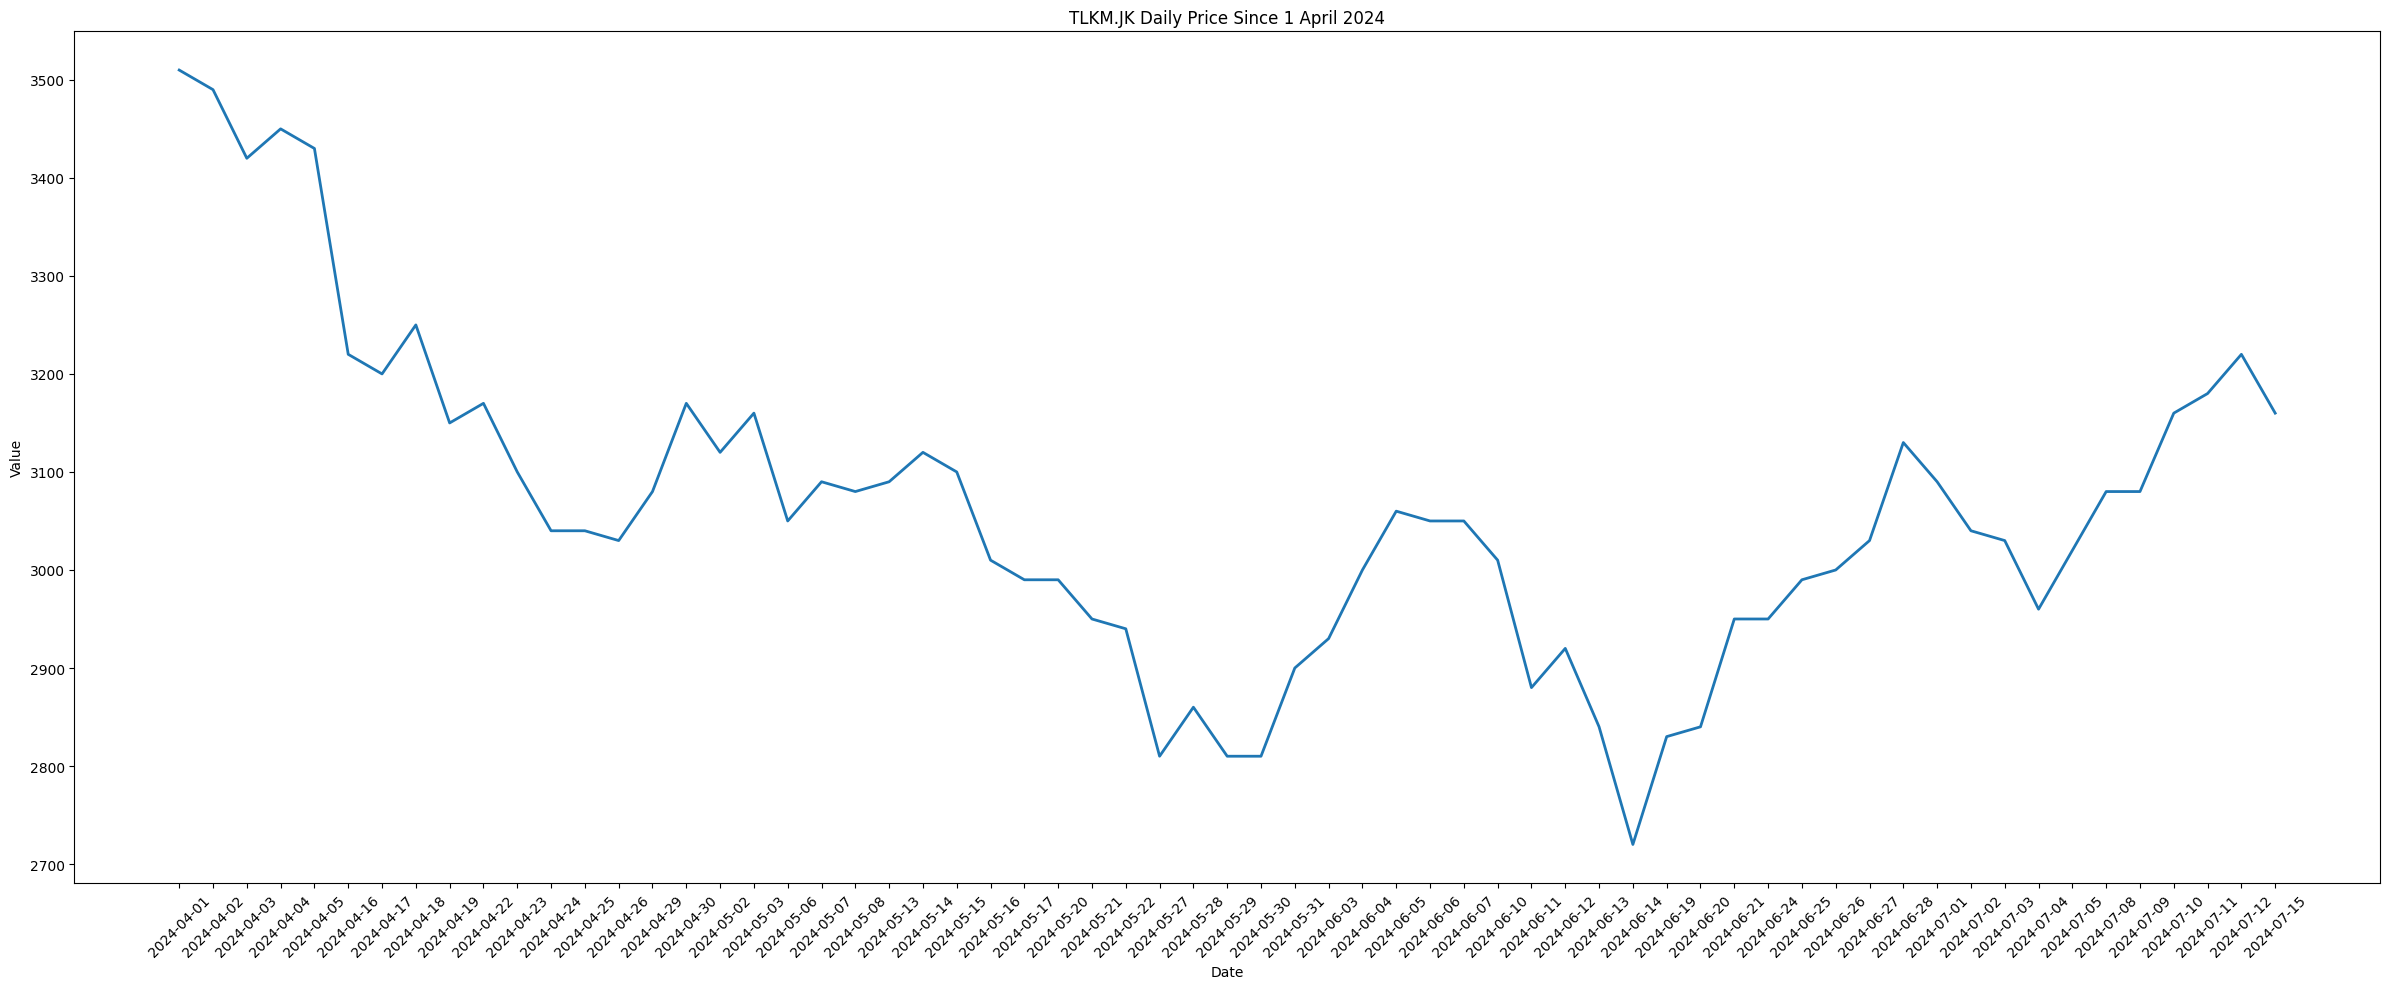

In [ ]:
# fetch TLKM data from table
df_tlkm = df_daily_hist[df_daily_hist.symbol == "TLKM.JK"]

plt.figure(figsize=(24, 10))
plt.plot(df_tlkm['date'], df_tlkm['close'], linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('TLKM.JK Daily Price Since 1 April 2024')
plt.xticks(rotation=45) # rotate x-axis labels by 45 degrees
plt.tight_layout()

<ipython-input-16-63ae9f546dc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tlkm['date'] = pd.to_datetime(df_tlkm['date'])


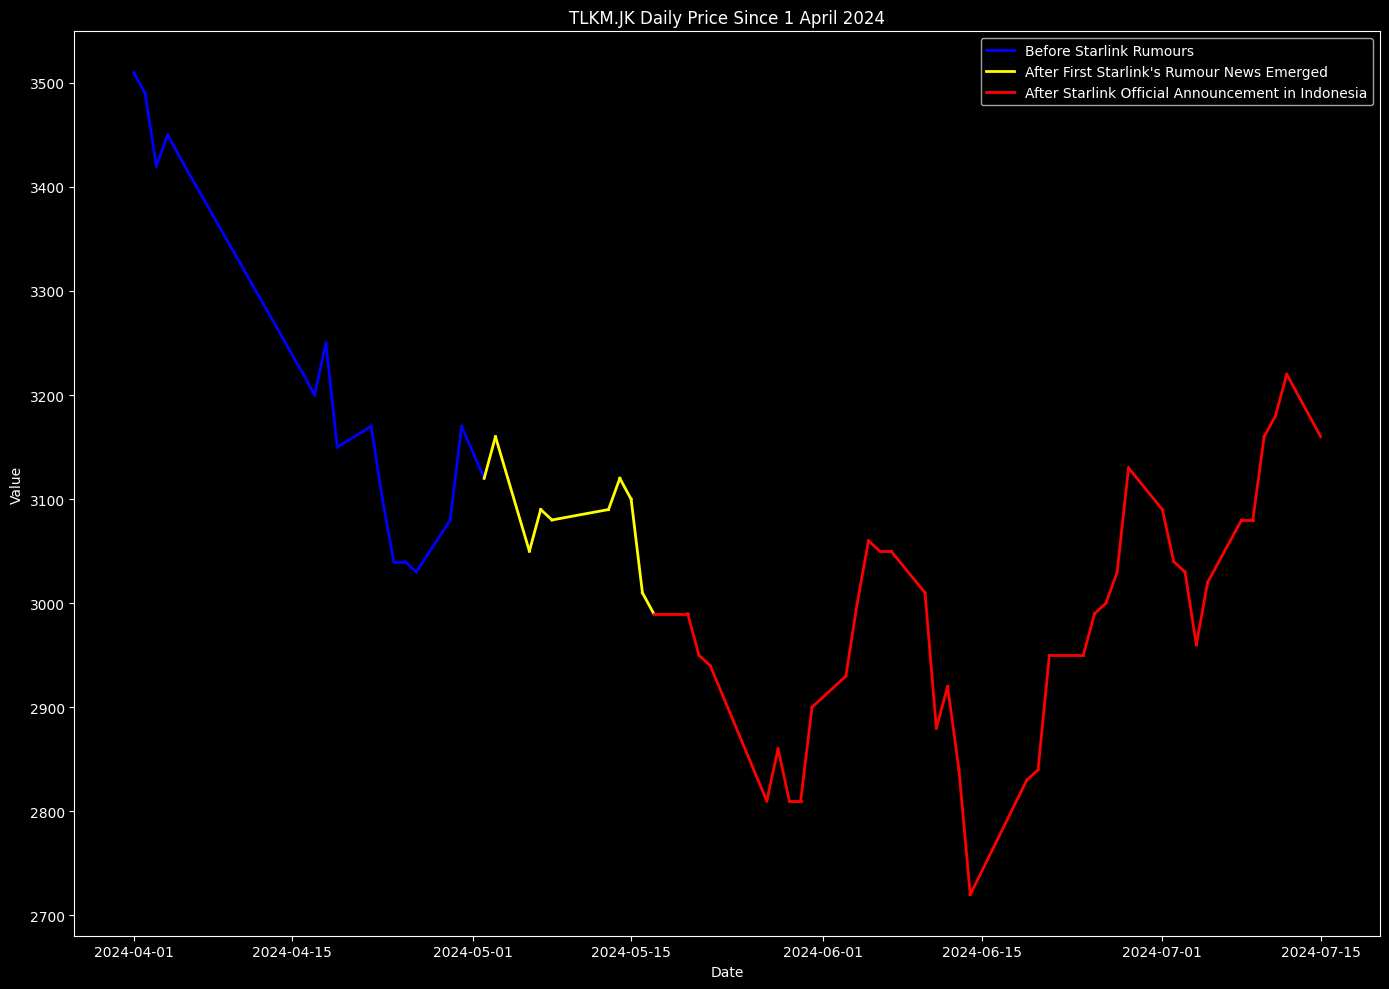

In [ ]:
# Convert date to datetime
df_tlkm['date'] = pd.to_datetime(df_tlkm['date'])

# Define the color change dates
yellow_date = pd.Timestamp('2024-05-02')
red_date = pd.Timestamp('2024-05-19')

# Plotting the data with conditional coloring
plt.style.use('dark_background')
plt.figure(figsize=(14, 10))

# Plot each segment with the appropriate color
for i in range(len(df_tlkm) - 1):
    start_date = df_tlkm['date'].iloc[i]
    end_date = df_tlkm['date'].iloc[i + 1]
    if end_date > red_date:
        color = 'red'
    elif end_date > yellow_date:
        color = 'yellow'
    else:
        color = 'blue'

    plt.plot(df_tlkm['date'].iloc[i:i+2], df_tlkm['close'].iloc[i:i+2], color=color, linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('TLKM.JK Daily Price Since 1 April 2024')
plt.tight_layout()

# Create custom legend
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Before Starlink Rumours')
yellow_line = mlines.Line2D([], [], color='yellow', linewidth=2, label="After First Starlink's Rumour News Emerged")
red_line = mlines.Line2D([], [], color='red', linewidth=2, label='After Starlink Official Announcement in Indonesia')

plt.legend(handles=[blue_line, yellow_line, red_line])

# Show the plot
plt.show()